In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import theano.tensor as tt
import math

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
D:\Anaconda2\envs\py36\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
D:\Anaconda2\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import

In [2]:
hosp = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
deaths = [0, 18, 8, 46, 8, 13, 9, 31, 14, 8, 29, 24]
total = [47, 148, 119, 810, 211, 196, 148, 215, 207, 97, 256, 360]
cols = ["R", "N"]
surgical_data = pd.DataFrame(columns = cols)
surgical_data["R"] = deaths
surgical_data["N"] = total

In [3]:
surgical_data

,R,N
0,0,47
1,18,148
2,8,119
3,46,810
4,8,211
5,13,196
6,9,148
7,31,215
8,14,207
9,8,97


In [4]:
N = len(surgical_data)
index = [0,1,2,3,4,5,6,7,8,9,10,11]
print(index[0])


0


In [5]:
with pm.Model() as surgical_model:
    mu_b = pm.Normal('mu', mu=0, sd = 1e-6)
    tau_b = pm.Gamma('tau', 0.001, 0.001)
    #sd_b = pm.Deterministic('sd_b', 1/pm.math.sqrt(tau_b))
    b = pm.Normal('b', mu=mu_b, tau= tau_b, shape=N)
    prob = pm.Deterministic('prob', pm.math.invlogit(b[index]))
    r = pm.Binomial('r', p = prob[index], n = total, observed = deaths)
    

In [6]:
with surgical_model:
    #computing approximate posterior using VI
    approx=pm.fit()
    #sampling from approximate posterior
    surgical_trace=approx.sample(500)

Average Loss = 7.9679e+09: 100%|████████████████████████████████████████████████| 10000/10000 [01:31<00:00, 109.69it/s]
Finished [100%]: Average Loss = 7.9713e+09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020DED565A90>,
      dtype=object)

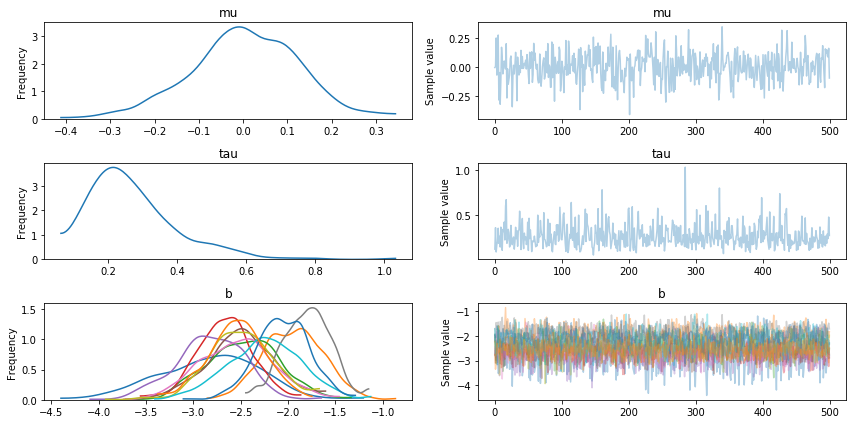

In [7]:
pm.traceplot(surgical_trace, varnames=['mu', 'tau', 'b'])

In [8]:
pm.summary(surgical_trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
mu,0.001809,0.122210,0.005566,-0.229191,0.255260
b__0,-2.828139,0.535772,0.025202,-3.915015,-1.882699
b__1,-1.945931,0.312724,0.013690,-2.485770,-1.307974
b__2,-2.469803,0.377402,0.016655,-3.192778,-1.783489
b__3,-2.671661,0.290273,0.012797,-3.235525,-2.104185
b__4,-2.829364,0.356583,0.015184,-3.533014,-2.170305
b__5,-2.506795,0.358537,0.015903,-3.190492,-1.754122
b__6,-2.545087,0.387021,0.015786,-3.324206,-1.831911
b__7,-1.798878,0.246650,0.010758,-2.361627,-1.399865
b__8,-2.506229,0.339176,0.015758,-3.166065,-1.894636
